In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
df=pd.read_csv('Data/E-commerce/training_sample.csv')

In [42]:
df['sign_in'].value_counts()

0    414957
1     40444
Name: sign_in, dtype: int64

In [43]:
df.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df['saw_homepage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 455401 entries, 0 to 455400
Series name: saw_homepage
Non-Null Count   Dtype
--------------   -----
455401 non-null  int64
dtypes: int64(1)
memory usage: 3.5 MB


### 기초 EDA

- 1.페이지 접속경로
    - pc, moblie , tablet 을 사용하여 접속하는 유저는 각각의 column에 1로 표기됨
    - 각각의 column 데이터가 0,1로 3개의 column으로 표현되어있으므로 '페이지 접속카테고리' 의 하나의 컬럼으로 pc, moblie, tablet을 나누겟다.

In [44]:
df.loc[:,['device_mobile','device_computer','device_tablet']]

,device_mobile,device_computer,device_tablet
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
455396,1,0,0
455397,1,0,0
455398,1,0,0
455399,1,0,0


In [51]:
device_list=['device_mobile','device_computer','device_tablet']
dx=df.loc[:,['device_mobile','device_computer','device_tablet']]

for list in device_list:
    
    print(f"Ratio of 1s in {list}:",dx.query(f"{list} == 1").shape[0]/df.shape[0])

Ratio of 1s in device_mobile: 0.6807055759649189
Ratio of 1s in device_computer: 0.19422003904251417
Ratio of 1s in device_tablet: 0.12836379366755893


In [40]:
dx=df.loc[:,['device_mobile','device_computer','device_tablet']]
df_category=pd.DataFrame

KeyError: "None of [Index(['device_mobile', 'device_computer', 'device_tablet'], dtype='object')] are in the [columns]"

In [32]:
dx=df.loc[:,['device_mobile','device_computer','device_tablet']]
df_category=pd.DataFrame
sns.barplot(x=dx.value_counts(normalize=True).index, y=dx.value_counts(normalize=True).values)


KeyError: "None of [Index(['device_mobile', 'device_computer', 'device_tablet'], dtype='object')] are in the [columns]"

- case를 나눌수있는부분
    - 데이터셋을 나눠서 1주일전 로그 , 지금 로그 로 참작

- 일단 총사용자수 알아보기


In [6]:
df.shape[0]

455401

In [8]:
df.query('saw_homepage==1').shape[0]  

132077

In [11]:
df.query('saw_homepage==1 & sign_in==1').shape[0]

23234

In [12]:
df.query('saw_homepage==1 & sign_in==0').shape[0]

108843

In [15]:
df.query('saw_homepage==1')['ordered'].value_counts()

0    120005
1     12072
Name: ordered, dtype: int64

<AxesSubplot:>

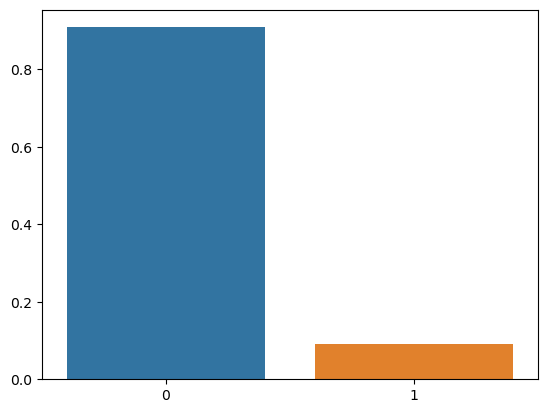

In [18]:
dx=df.query('saw_homepage==1')['ordered']
import seaborn as sns
sns.barplot(x=dx.value_counts(normalize=True).index, y=dx.value_counts(normalize=True).values)


- 홈페이지를 방문한 사람들중 구매안한사람 90프로 10프로

------------

- 홈페이지를 방문한사람들중 로그인한사람 23234 안한사람 108843

---
- 목표: ordered =>주문량을 늘리는것 or saw_homepage => 구매홈페이지